In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster

# t-SNE

t-SNE es la abreviación de t-distributed Stochastic Neighbor Embedding.

t-SNE reduce la dimensionalidad de un conjunto de datos.
Convierte puntos cercanos (en el sentido Euclidiano) en altas dimensiones
en puntos cercanos en dos dimensiones.

El algoritmo es estocástico, así que diferentes inicializaciones van a dar diferentes resultados.

Un buen lugar para empezar a aprender sobre los detalles es la página de uno de los
creadores del algoritmo: https://lvdmaaten.github.io/tsne/

Los objetivos de aprendizaje de este notebook son:
- Aprender a utilizar la implementación de t-SNE para sklearn.
- Visualizar los resultados de t-SNE.
- Aplicar k-means clustering sobre los resultados de t-SNE

## Dataset de entrenamiento

Vamos a utilizar el dataset `sklearn.datasets.load_digits()` que contiene
1797 digitos manuscritos representados en imágenes de 8 por 8 pixeles.
Es decir, cada elemento vive en 64 dimensiones. 
El objetivo al aplicar t-SNE es ver si en efecto logran verse 10 clusters
que corresponderían a cada uno de los dígitos.

Empezamos por cargar los datos. 
Llamaremos `X` a las imágenes y `Y` a los enteros que marcan a qué dígito corresponde cada imagen.

(1797, 64) (1797,)


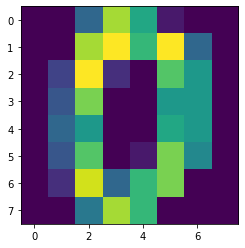

In [13]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']
print(np.shape(X), np.shape(Y))
plt.imshow((X[0].reshape((8,8))))

## Entrenamiento del algoritmo

Inicializamos el objeto TSNE.
El parámetro más relevante es `perplexity`. Es equivalente a cambiar el número de 
primero vecinos que usa el algoritmo para definir su ambiente local.
Típicamente se recomienda variarlo entre 5 y 50.

In [14]:
tsne = sklearn.manifold.TSNE(perplexity=20)

Ahora ejecutamos la fase de aprendizaje

In [15]:
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=20,
     random_state=None, verbose=0)

## Visualización de los resultados

Extraemos la representación de los datos en el espacio bidimensional

In [18]:
embedding = tsne.embedding_
np.shape(embedding)

(1797, 2)

Finalmente graficamos los datos en su nueva representación.
Para visualizar la relación de la nueva ubicación de los datos con su label original, utilizamos colores.

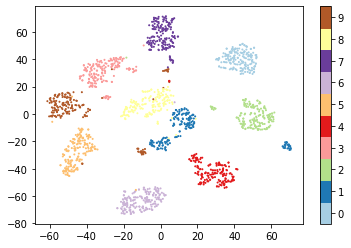

In [24]:
plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

Efectivamente, vemos que imágenes que corresponden a los mismos dígitos se encuentran ahora
en grupos vecinos. 

**Es importante notar que puntos cercanos dentro de un cluster son similares, pero puntos
en clusters cercanos no son necesariamente similares.**

Con esto mente, vamos ahora a aplicar k-means clustering sobre los datos en su nueva representación.
Vamos a buscar 10 clusters.

## k-means clustering sobre los resultados

In [21]:
# clusters sobre los resultados de tsne
n_clusters = 10
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster

Ahora graficamos los puntos coloreados por el cluster predicho por k-means clustering

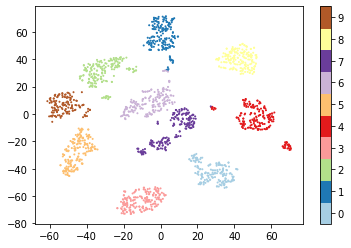

In [22]:
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

## Visualización de imágnes en el mismo cluster

Para terminar vamos a graficar 10 ejemplos de imágenes para cada uno de los clusters

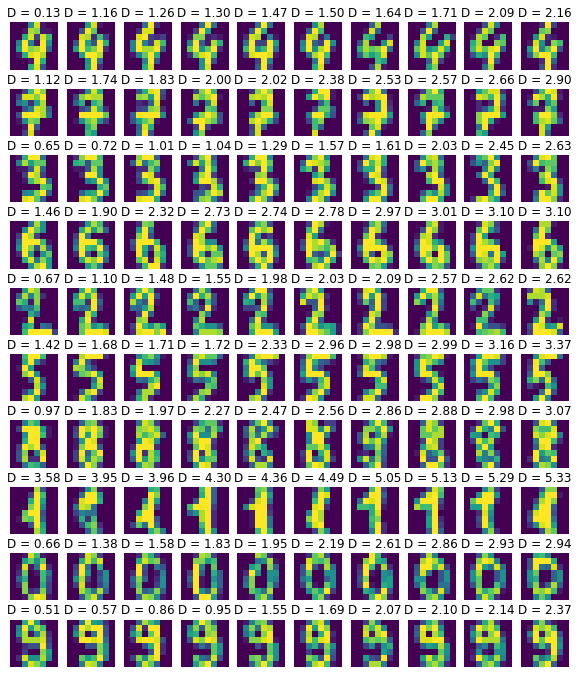

In [25]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(imagenes[ind].reshape(8,8))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')
